<a href="https://colab.research.google.com/github/Sarach-git/CS-SBU-eDataMining-MSc-2022/blob/400422066/project_1/New_York_City_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-SBU-eDataMining-MSc-2022
Presented by Sara Charmchi  
Student ID : 400422066  

## New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)  
Dataset : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?datasetId=268833



# Importing libraries

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import branca.colormap as cm
import zipfile
from scipy import stats
import urllib
from geopy.distance import geodesic


%matplotlib inline
from skimage.io import imread

# Loading Data

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saracharmchi","key":"06b771d04d3c49745c3e9246ff2d5a31"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 122MB/s]


In [6]:
!ls

kaggle.json  new-york-city-airbnb-open-data.zip  sample_data


In [7]:
zip_ref = zipfile.ZipFile('new-york-city-airbnb-open-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [8]:
df=pd.read_csv('/content/files/AB_NYC_2019.csv')

In [9]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.shape

(48895, 16)

In [12]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Q1-Cleaning data


*   Removing irrelevant columns
*   Filling missing data
*   Detecting outliers



Dealing with NAN data & deleting columns without useful information

In [13]:
df.isna().sum()/len(df)

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [14]:
df.columns[df.isna().sum()/len(df)>0]

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [15]:
df.drop(['host_name','last_review'], axis=1, inplace=True)
df.columns[df.isna().sum()>0]

Index(['name', 'reviews_per_month'], dtype='object')

Why fill NAN ? coz if there is no info about reviews per month we can consider it as no reviews per month so we can replace them with zero

In [16]:
df.fillna({'reviews_per_month':0} , inplace=True)

In [17]:
df.fillna({'name':'No name'} , inplace=True)

Recheck Nan data :

In [18]:
df.columns[df.isna().sum()/len(df)>0]

Index([], dtype='object')

Checking duplicated data :

In [19]:
df.duplicated().sum()

0

Dealing with outliers 

we can not have min=0 for price, so it should be dropped.

In [20]:
df=df[df['price']>0]

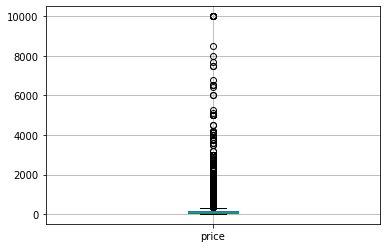

In [21]:
df.boxplot(column='price')

then try to ignore outranges in price data

In [22]:
upper_range=df['price'].mean()+ 3* df['price'].std()
lower_range=df['price'].mean()- 3* df['price'].std()

indexes=df[(df['price']>upper_range)| (df['price']<lower_range)].index
df=df.drop(indexes)


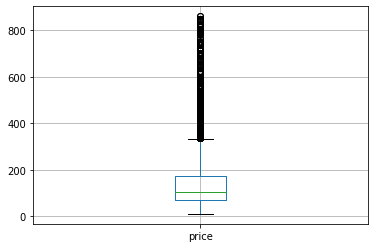

In [23]:
df.boxplot(column='price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


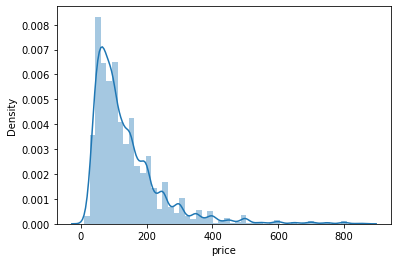

In [24]:
sns.distplot(df['price'])

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


id                                1.965698e+07
host_id                           9.960905e+07
latitude                          7.315500e-02
longitude                         4.687000e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.560000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.250000e+02
dtype: float64


In [26]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3+(1.5 * IQR)
 return lower_range,upper_range

In [27]:
lower_bound,upper_bound = outlier_treatment(df['price'])

In [28]:
df[(df.price < lower_bound) | (df.price > upper_bound)]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,19601,perfect for a family or small group,74303,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0.00,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0.00,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0.00,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0.00,1,9


In [29]:
df = df[(df.price>lower_bound) & (df.price<upper_bound)]

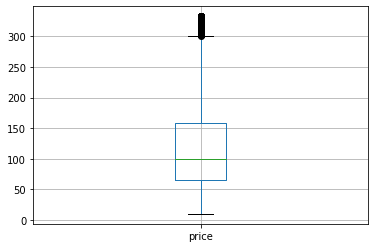

In [30]:
df.boxplot(column='price')

Finally recheck numeric data :

In [31]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.590700e+04,4.590700e+04,45907.000000,45907.000000,45907.000000,45907.00000,45907.000000,45907.000000,45907.000000,45907.000000
mean,1.889745e+07,6.632663e+07,40.728491,-73.950734,119.975755,6.93587,23.942471,1.107734,6.620755,109.356590
std,1.092016e+07,7.756637e+07,0.055336,0.046473,68.100096,19.85941,45.318126,1.612642,30.942071,130.277969
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.00000,0.000000,0.000000,1.000000,0.000000
25%,9.435717e+06,7.720272e+06,40.689230,-73.981920,65.000000,1.00000,1.000000,0.050000,1.000000,0.000000
50%,1.952160e+07,3.028359e+07,40.721770,-73.954370,100.000000,2.00000,5.000000,0.380000,1.000000,39.000000
75%,2.891256e+07,1.054977e+08,40.763405,-73.934330,159.000000,5.00000,24.000000,1.620000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,1250.00000,629.000000,58.500000,327.000000,365.000000


shape of the data :

In [32]:
df.shape

(45907, 14)

# Q2-Data Visualization

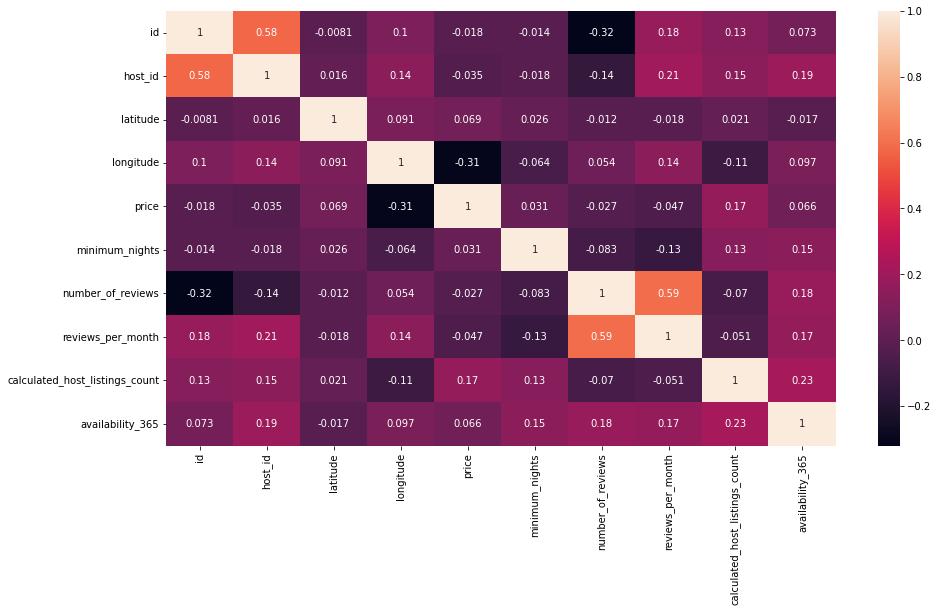

In [33]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [34]:
df.name.value_counts().iloc[:10]

Hillside Hotel                                18
Home away from home                           17
No name                                       15
New york Multi-unit building                  13
Brooklyn Apartment                            12
Private Room                                  11
Loft Suite @ The Box House Hotel              11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Brooklyn                       8
Name: name, dtype: int64

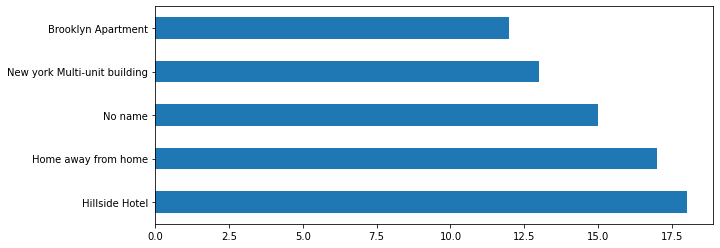

In [35]:
plt.figure(figsize=(10,4))
df.name.value_counts().iloc[:5].plot(kind = 'barh')

In [36]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [37]:
df.neighbourhood_group.value_counts()

Manhattan        19500
Brooklyn         19406
Queens            5567
Bronx             1069
Staten Island      365
Name: neighbourhood_group, dtype: int64

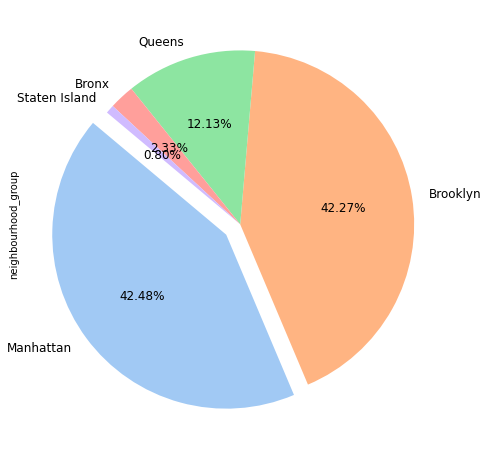

In [38]:
colors = sns.color_palette('pastel')[0:5]
explode = (0.1, 0, 0, 0, 0)
plt.figure(figsize=(10,8))
df['neighbourhood_group'].value_counts().plot(kind='pie', explode=explode,  autopct='%1.2f%%', startangle=140, fontsize=12, colors = colors)



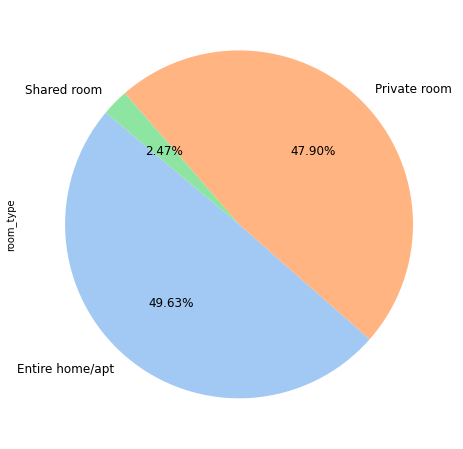

In [39]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,8))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.2f%%', startangle=140, fontsize=12, colors = colors)



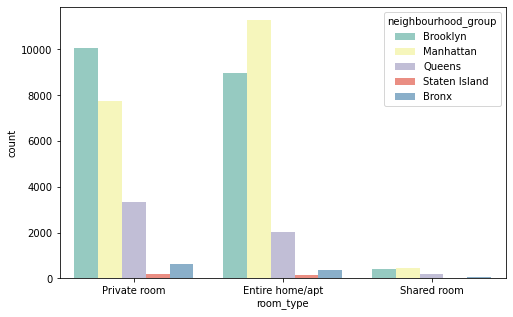

In [40]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(x='room_type',hue='neighbourhood_group',data=df,palette="Set3")

In [41]:
m = folium.Map([40.730610, -73.935242],width="%100",height="%100")

locations = list(zip(df.latitude, df.longitude))
cluster = plugins.MarkerCluster(locations=locations, popups=df["neighbourhood"].tolist())  


m.add_child(cluster)
m.save('NYC_map.html') # Saves Map to an HTML File

In [42]:
m = folium.Map(location=[40.730610, -73.935242],width="%100",height="%100")
for i in range(len(locations)):
    folium.CircleMarker(location=locations[i],radius=1).add_to(m)
m.save('NYC_map_circle.html') # Saves Map to an HTML File


Text(0.5, 1.0, 'Location-neighbourhood_group')

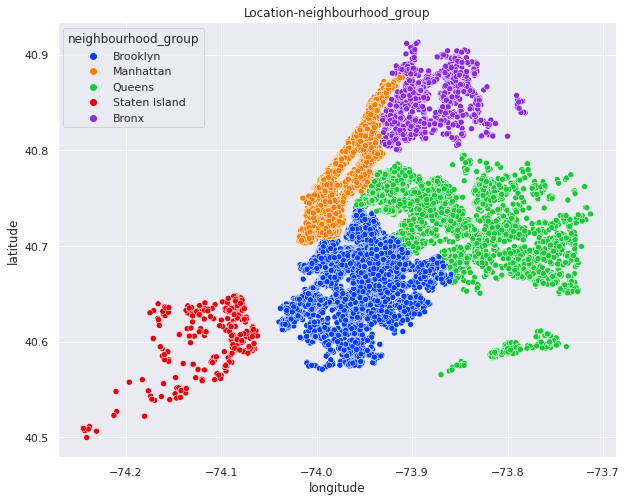

In [43]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location-neighbourhood_group')

Text(0.5, 1.0, 'Location-room_type')

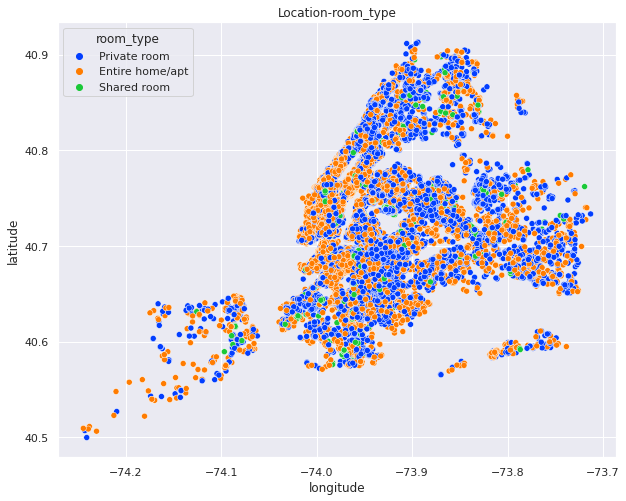

In [44]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location-room_type')

Text(0.5, 1.0, 'Location-availability_365')

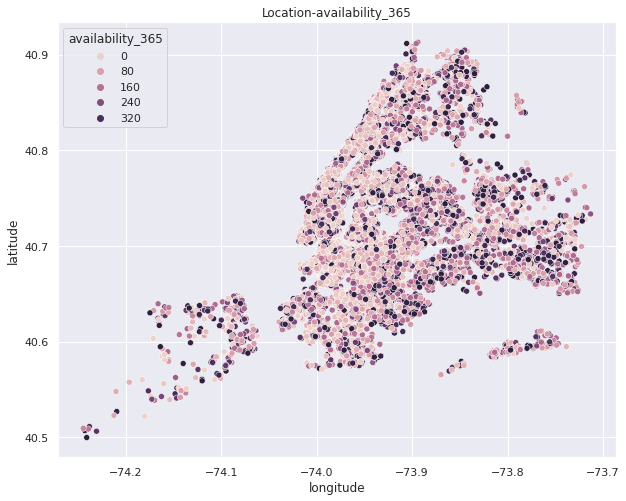

In [45]:
plt.figure(figsize=(10,8))
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='availability_365')
ax.set_title('Location-availability_365')

Price

In [46]:
df.price.describe()

count    45907.000000
mean       119.975755
std         68.100096
min         10.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        333.000000
Name: price, dtype: float64

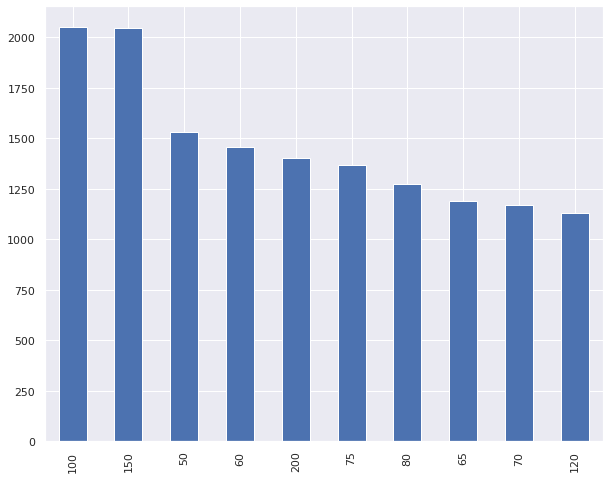

In [47]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

In [48]:
df[df['price'] == 333.000000]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
13798,10403199,Mid-Century Museum Sleepover,29065752,Brooklyn,Williamsburg,40.71863,-73.94528,Entire home/apt,333,7,0,0.00,1,365
15150,12093494,Midtown Sleep 6 Central Convenience,62031986,Manhattan,Midtown,40.75237,-73.98769,Entire home/apt,333,1,246,6.38,1,323
19641,15728780,"SOMMwhere in NYC/ a unique, conscious artists ...",148108,Manhattan,Lower East Side,40.72297,-73.98946,Private room,333,1,40,1.27,2,62
25161,20154569,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,35635299,Manhattan,Midtown,40.74353,-73.98364,Entire home/apt,333,30,66,2.81,1,210
28062,21919913,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,76104209,Manhattan,Upper West Side,40.77055,-73.98615,Entire home/apt,333,30,0,0.00,33,330
32976,26004664,Luxurious 2bed/2.5bath with Central Park Views,4876826,Manhattan,Midtown,40.76591,-73.97886,Entire home/apt,333,12,1,0.10,1,110
38565,30327469,Parisian Palace in Heart of Manhattan,224001464,Manhattan,Chelsea,40.73734,-73.99327,Entire home/apt,333,4,4,1.41,1,80
45303,34659944,Five-star luxury Apt in Chelsea !,152747338,Manhattan,Chelsea,40.74674,-74.00316,Entire home/apt,333,1,4,2.35,1,365
48567,36315904,Your Private Duplex Mansion in the HEART of NYC!,269146714,Manhattan,West Village,40.73670,-74.00105,Entire home/apt,333,2,0,0.00,1,336


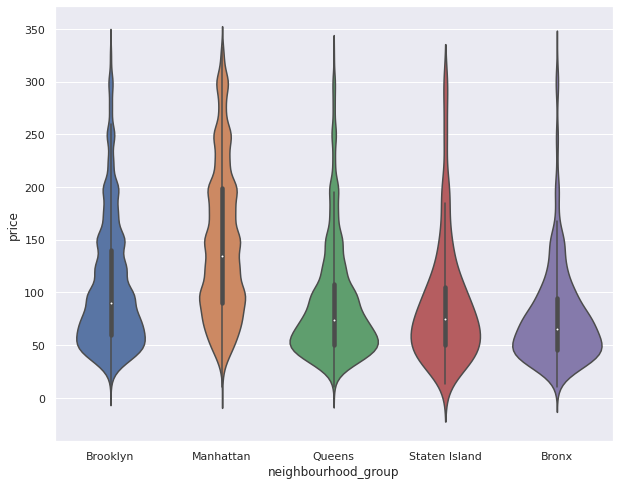

In [49]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=df)

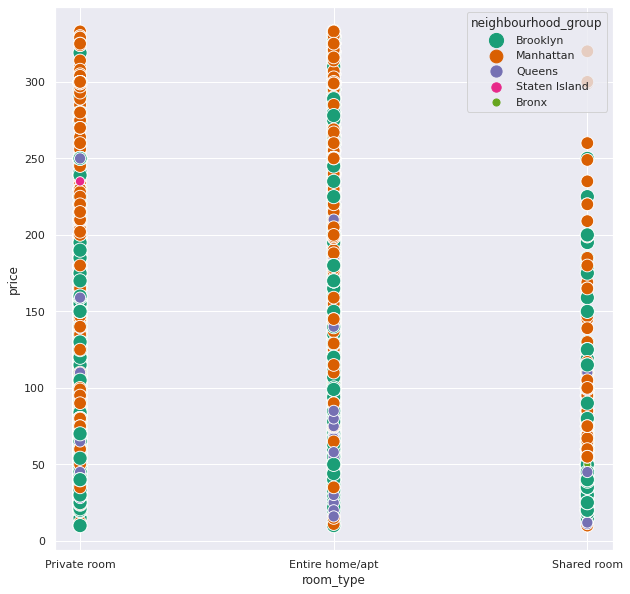

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",hue="neighbourhood_group", size="neighbourhood_group",sizes=(50, 200), palette="Dark2", data=df)

In [51]:
airbnb=df[["latitude","longitude","price"]]
min_price=df["price"].min()
max_price=df["price"].max()
df["price"].describe().to_frame()

,price
count,45907.000000
mean,119.975755
std,68.100096
min,10.000000
25%,65.000000
50%,100.000000
75%,159.000000
max,333.000000


In [52]:
m = folium.Map(location=[40.730610, -73.935242],width="%100",height="%100")
colormap = cm.StepColormap(colors=['green','yellow','orange','red'] ,
                           index=[min_price,69,105,175,max_price], 
                           vmin= min_price,
                           vmax=max_price)
for loc, p in zip(zip(df["latitude"],df["longitude"]),df["price"]):
      folium.Circle(
      location=loc,
      radius=2, 
      fill=True, 
      color=colormap(p)
).add_to(m)


m.save('NYC_map_locprice.html') # Saves Map to an HTML File

#Q3- number of listings vs host

In [53]:
df.host_id.value_counts().iloc[:10]

219517861    272
107434423    176
137358866    103
30283594      95
12243051      95
61391963      91
16098958      90
22541573      87
7503643       52
1475015       52
Name: host_id, dtype: int64

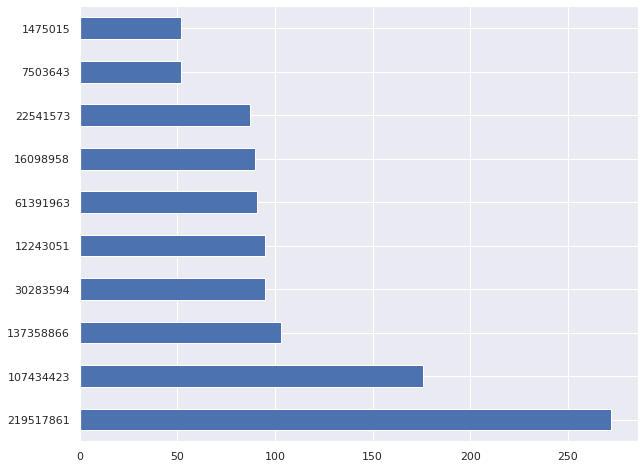

In [54]:
df.host_id.value_counts().iloc[:10].plot(kind = 'barh')

In [55]:
df.host_id.value_counts().max()

272

In [56]:
df_host = df.groupby(['host_id','name'])
df_host.size().sort_values()

host_id    name                                              
2438       Great Price: Williamsburg Brooklyn Loft off L stop     1
64116761   Carroll Gardens 1 Bedroom Studio Apartment             1
64156488   Private Room in Central Manhattan                      1
64161144   Gorgeous Sunlit One Bedroom - Uptown Manhattan         1
64170751   Comfortable Bedroom right by express subway!           1
                                                                 ..
27636707   WEST VILLAGE Bohemian flat in neo-Tudor town house     5
76104209   IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
230192510  Artsy Private BR in Fort Greene Cumberland            10
417504     Loft Suite @ The Box House Hotel                      11
134184451  Hillside Hotel                                        18
Length: 45683, dtype: int64

In [57]:
df_host.sum()

id  \
host_id   name                                                           
2438      Great Price: Williamsburg Brooklyn Loft off L stop  23669201   
2571      THE PUTNAM                                           1101224   
2787      Brooklyn home.  Comfort and clean. Liguria room.    17263207   
          Cinque Terre Room.  Clean and Quiet Queen Bedroom   10267242   
          Clean & quiet apt home by the park                      2539   
...                                                                ...   
274273284 Welcome all as family                               36478343   
274298453 Peaceful space in Greenpoint, BK                    36481615   
274307600 Brooklyn Oasis in the heart of Williamsburg         36482783   
274311461 Comfy 1 Bedroom in Midtown East                     36483010   
274321313 Spacious Room w/ Private Rooftop, Central location  36484087   

                                                              latitude  \
host_id   name                                                           
2438      Great Price: Williamsburg Brooklyn Loft off L stop  40.71412   
2571      THE PUTNAM                                          40.68674   
2787      Brooklyn home.  Comfort and clean. Liguria room.    40.60877   
          Cinque Terre Room.  Clean and Quiet Queen Bedroom   40.60810   
          Clean & quiet apt home by the park                  40.64749   
...                                                                ...   
274273284 Welcome all as family                               40.78749   
274298453 Peaceful space in Greenpoint, BK                    40.72585   
274307600 Brooklyn Oasis in the heart of Williamsburg         40.71790   
274311461 Comfy 1 Bedroom in Midtown East                     40.75561   
274321313 Spacious Room w/ Private Rooftop, Central location  40.76392   

                                                              longitude  \
host_id   name                                                            
2438      Great Price: Williamsburg Brooklyn Loft off L stop  -73.94447   
2571      THE PUTNAM                                          -73.93845   
2787      Brooklyn home.  Comfort and clean. Liguria room.    -73.97382   
          Cinque Terre Room.  Clean and Quiet Queen Bedroom   -73.97541   
          Clean & quiet apt home by the park                  -73.97237   
...                                                                 ...   
274273284 Welcome all as family                               -73.94749   
274298453 Peaceful space in Greenpoint, BK                    -73.94001   
274307600 Brooklyn Oasis in the heart of Williamsburg         -73.96238   
274311461 Comfy 1 Bedroom in Midtown East                     -73.96723   
274321313 Spacious Room w/ Private Rooftop, Central location  -73.99183   

                                                              price  \
host_id   name                                                        
2438      Great Price: Williamsburg Brooklyn Loft off L stop     95   
2571      THE PUTNAM                                            182   
2787      Brooklyn home.  Comfort and clean. Liguria room.       49   
          Cinque Terre Room.  Clean and Quiet Queen Bedroom     149   
          Clean & quiet apt home by the park                    149   
...                                                             ...   
274273284 Welcome all as family                                 140   
274298453 Peaceful space in Greenpoint, BK                       54   
274307600 Brooklyn Oasis in the heart of Williamsburg           190   
274311461 Comfy 1 Bedroom in Midtown East                       200   
274321313 Spacious Room w/ Private Rooftop, Central location    125   

                                                              minimum_nights  \
host_id   name                                                                 
2438      Great Price: Williamsburg Brooklyn Loft off L stop              45   
25

In [58]:
df_host.groups

{(2438, 'Great Price: Williamsburg Brooklyn Loft off L stop'): [30604], (2571, 'THE PUTNAM'): [2290], (2787, 'Brooklyn home.  Comfort and clean. Liguria room.'): [21556], (2787, 'Cinque Terre Room.  Clean and Quiet Queen Bedroom'): [13688], (2787, 'Clean & quiet apt home by the park'): [0], (2787, 'La Spezia room.  Clean, quiet and comfortable bed'): [13963], (2787, 'Riomaggiore Room. Queen Bedroom in Bklyn Townhouse'): [10372], (2787, 'Torre del Lago Room.'): [13583], (2845, 'Midtown Sanctuary'): [22728], (2845, 'Skylit Midtown Castle'): [1], (2868, 'Cozy Clinton Hill Crib On Classon'): [16512], (2881, 'Historic room in renovated brownstone'): [8302], (2881, 'Newly renovated historic brownstone'): [7875], (3151, 'Crashpad in Clinton Hill'): [42825], (3211, 'Elegant NYC, 10mins to Manhattan!'): [6698], (3415, 'Beautiful Furnished Master Bedroom'): [9409], (3563, '16' x 11' Furnished BR with Balcony'): [5707], (3647, 'Quality Cozy Studio Next to Subway'): [650], (3647, 'Queens Quality C

In [59]:
df[df['host_id']== 219517861].name.nunique()

260

In [60]:
df.name.nunique()

44977

In [61]:
df.name.count()

45907

In [62]:

df_host = df.groupby(['host_id']).agg(['nunique']).stack()
df_host.head()

,,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
2438,nunique,1,1,1,1,1,1,1,1,1,1,1,1,1
2571,nunique,1,1,1,1,1,1,1,1,1,1,1,1,1
2787,nunique,6,6,1,3,5,6,2,4,1,6,6,1,5
2845,nunique,2,2,1,1,2,2,2,2,1,2,2,1,2
2868,nunique,1,1,1,1,1,1,1,1,1,1,1,1,1


In [63]:
top10_host= df_host.nlargest(10,'name')
top10_host.head()

,,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,,
219517861,nunique,272,260,1,7,222,232,2,93,2,19,125,1,106
107434423,nunique,176,175,2,19,172,168,1,72,4,3,16,1,111
137358866,nunique,103,103,3,10,101,100,2,37,1,5,35,1,46
12243051,nunique,95,95,1,5,90,91,1,51,1,5,22,1,57
30283594,nunique,95,95,1,8,93,88,1,23,2,5,12,1,27


#Q4-HOST VS NUMBER OF REVIEWS

In [64]:
df['number_of_reviews'].value_counts()

0      9008
1      4927
2      3283
3      2371
4      1895
       ... 
386       1
340       1
458       1
253       1
341       1
Name: number_of_reviews, Length: 393, dtype: int64

In [65]:
top10_reviewed= df.nlargest(10,'number_of_reviews')
top10_reviewed.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


In [66]:
df.number_of_reviews.describe()

count    45907.000000
mean        23.942471
std         45.318126
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [67]:
df[df['number_of_reviews'] == 629]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,14.58,2,333


In [68]:
df[df['number_of_reviews'] > 24]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43735,33832840,"Beautiful, Cozy & Private Bedroom in Bushwick ...",11123552,Brooklyn,Bushwick,40.70110,-73.92194,Private room,50,1,26,9.40,2,74
43791,33877798,NYC High End Upper East Side Central Park Gem ...,147675745,Manhattan,Upper East Side,40.77867,-73.95143,Entire home/apt,151,1,30,11.25,1,42
44281,34150120,2 bed.Full apartment. L Train.15 min away from...,257832461,Brooklyn,Bushwick,40.70247,-73.92671,Entire home/apt,99,1,32,13.33,1,77
44435,34224023,Brilliant like studio apartment close to Manha...,254104585,Brooklyn,Bedford-Stuyvesant,40.68463,-73.92996,Private room,89,1,25,10.56,3,160


In [69]:
df["number_of_reviews"].describe().to_frame()

,number_of_reviews
count,45907.000000
mean,23.942471
std,45.318126
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


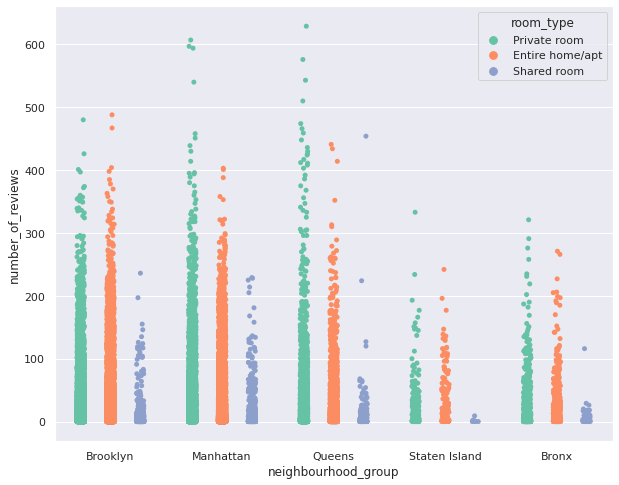

In [70]:
ax= sns.stripplot(x='neighbourhood_group',y='number_of_reviews',hue='room_type',dodge=True,data=df,palette='Set2')

In [71]:
top_review_neighbour= top10_reviewed.groupby('neighbourhood_group')
top_review_neighbour.size().sort_values(ascending= False)

neighbourhood_group
Manhattan    4
Queens       4
Brooklyn     2
dtype: int64

In [72]:
top_review_room= top10_reviewed.groupby('room_type')
top_review_room.size().sort_values(ascending= False)

room_type
Private room       9
Entire home/apt    1
dtype: int64

In [73]:
df.loc[df['room_type'] == 'Private room', 'home'] = True
df.loc[df['room_type'] != 'Private room', 'home'] = False
df_hypp = df[['home','number_of_reviews']]
df_hypp.head()

,home,number_of_reviews
0,True,9
1,False,45
2,True,0
3,False,270
4,False,9


In [74]:
df_hypp.groupby('home').count()

,number_of_reviews
home,
False,23918
True,21989


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f373fb46210>,
      dtype=object)

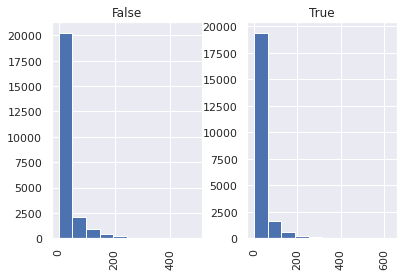

In [75]:
home = df_hypp['number_of_reviews'][df_hypp['home']==True]
non_home = df_hypp['number_of_reviews'][df_hypp['home']==False]
import matplotlib.pyplot as plt
%matplotlib inline
df_hypp.hist(by ='home')

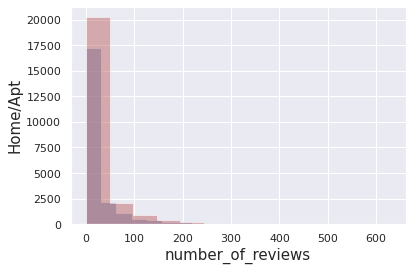

In [76]:
import seaborn as sns
home.hist(histtype='stepfilled', alpha=.5, bins=20)     # default number of bins = 10
non_home.hist(histtype='stepfilled', alpha=.5,color=sns.desaturate("indianred", 0.75 ), bins=10)
plt.xlabel('number_of_reviews',fontsize=15)
plt.ylabel('Home/Apt',fontsize=15)
plt.show()

In [77]:
import scipy.stats as st
pvt = df[df['room_type'] == 'Private room']
share = df[df['room_type'] == 'Shared room']
apt = df[df['room_type'] == 'Entire home/apt']
st.levene(pvt.number_of_reviews, share.number_of_reviews, apt.number_of_reviews)

LeveneResult(statistic=14.596990768180596, pvalue=4.59856641400037e-07)

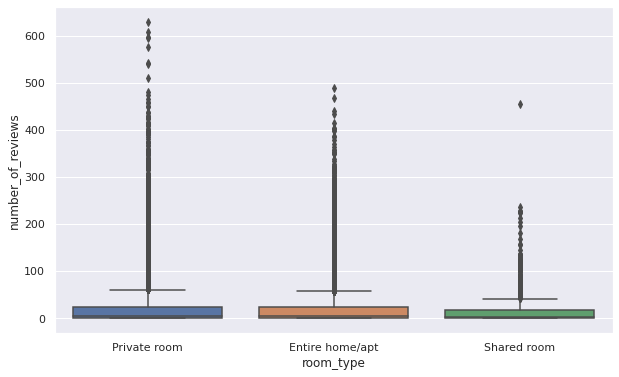

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(y='number_of_reviews',x='room_type',data=df)
plt.show()

In [79]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [80]:
a = df[df['neighbourhood_group'] == 'Brooklyn']['number_of_reviews']
b = df[df['neighbourhood_group'] == 'Manhattan']['number_of_reviews']
c = df[df['neighbourhood_group'] == 'Queens']['number_of_reviews']
d = df[df['neighbourhood_group'] == 'Staten Island']['number_of_reviews']
e = df[df['neighbourhood_group'] == 'Bronx']['number_of_reviews']

st.kruskal(a,b,c,d,e)

KruskalResult(statistic=221.1279817666322, pvalue=1.0719953553621434e-46)

#Q5-Hypothesis TEST

In [81]:
df.loc[df['room_type'] == 'Entire home/apt', 'home'] = True
df.loc[df['room_type'] != 'Entire home/apt', 'home'] = False

In [82]:
df_hyp = df[['home','price']]


In [83]:
df_hyp.groupby('home').count()

,price
home,
False,23125
True,22782


In [84]:
home = df_hyp['price'][df_hyp['home']==True]
non_home = df_hyp['price'][df_hyp['home']==False]

In [85]:
means_table =df_hyp.groupby('home').mean()
means_table

,price
home,
False,78.078573
True,162.503731


In [86]:
observatied_diff = means_table['price'][1] - means_table['price'][0]
observatied_diff

84.42515804274117

In [87]:
home = df_hyp[df_hyp['home']==True]
non_home = df_hyp[df_hyp['home']==False]

In [88]:
stats.f_oneway(home.price,non_home.price)

F_onewayResult(statistic=28642.039003759477, pvalue=0.0)

In [89]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'home'],
      dtype='object')

In [90]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

1-One Way ANOVA

In [91]:
st.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=24.524367116502283, pvalue=2.627963864762465e-20)

2-Two Way ANOVA

In [92]:
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [93]:
model = ols("price~neighbourhood_group+host_id",data=df).fit()

In [94]:
from statsmodels.stats.anova import anova_lm
anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
neighbourhood_group,2.447747e+07,4.0,1492.811395,0.000000
host_id,3.701216e+04,1.0,9.029069,0.002659
Residual,1.881584e+08,45901.0,NaN,NaN


3-Chi Squared Test

In [95]:
tab = pd.crosstab(df['room_type'],df['neighbourhood_group'])
st.chi2_contingency(tab)

(1190.4442890859682,
 1.1127147476863028e-251,
 8,
 array([[5.30506415e+02, 9.63050280e+03, 9.67715163e+03, 2.76270273e+03,
         1.81136428e+02],
        [5.12040451e+02, 9.29528251e+03, 9.34030758e+03, 2.66653807e+03,
         1.74831398e+02],
        [2.64531335e+01, 4.80214695e+02, 4.82540789e+02, 1.37759209e+02,
         9.03217374e+00]]))

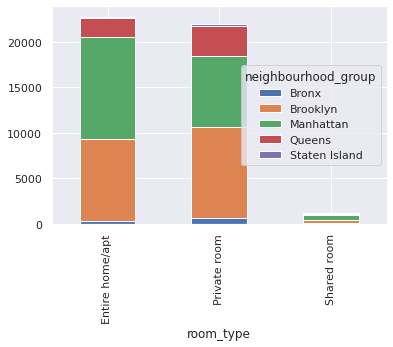

In [96]:
ct = pd.crosstab(df['room_type'],df['neighbourhood_group'])
ct.plot.bar(stacked=True)
plt.show()


4-LEVEN'S TEST

In [97]:
st.levene(pvt.price, share.price, apt.price)

LeveneResult(statistic=2373.430140290372, pvalue=0.0)

Shapiro Test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


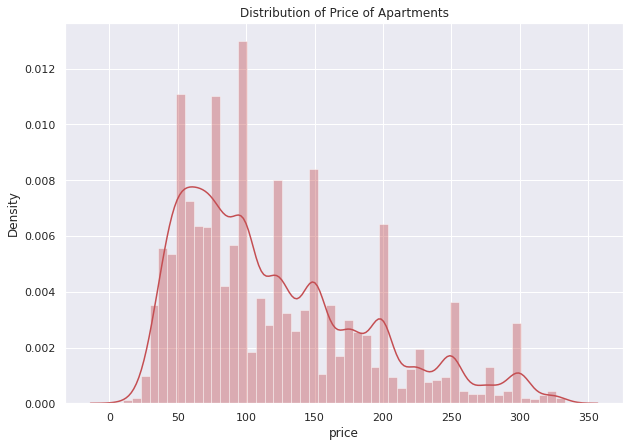

In [98]:
plt.figure(figsize=(10,7))
sns.distplot(df.price,color='r')
plt.xlabel("price")
plt.title("Distribution of Price of Apartments")
plt.show()

In [99]:
import scipy.stats as st
st.shapiro(df.price)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9190240502357483, 0.0)

# Q6-prediction

In [103]:
nyc_df = df.copy()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [105]:
encode = preprocessing.LabelEncoder()

In [107]:
encode.fit(nyc_df.neighbourhood_group)
nyc_df.neighbourhood_group=encode.transform(nyc_df.neighbourhood_group)

In [108]:
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.neighbourhood)
nyc_df.neighbourhood=encode.transform(nyc_df.neighbourhood)
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.room_type)
nyc_df.room_type=encode.transform(nyc_df.room_type)
nyc_df.sort_values(by='price',ascending=True,inplace=True)

In [128]:
nyc_df.head(10)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,home
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,2,64,40.73051,-73.98140,0,10,30,0,0.00,4,137,True
34446,27316669,Bronx Apart,205820814,0,95,40.83454,-73.92751,1,10,1,0,0.00,1,180,False
31407,24412104,Cozy feel at home studio,91034542,2,111,40.74408,-73.97803,1,10,5,42,2.87,1,2,False
35601,28270998,"Charming, bright and brand new Bed-Stuy home",647528,1,13,40.69508,-73.95164,0,10,3,5,0.51,1,0,True
32810,25839759,Gigantic Sunny Room in Park Slope-Private Back...,167570251,1,189,40.66242,-73.99464,0,10,1,14,1.06,1,4,True
31066,24114389,"Very Spacious bedroom, steps from CENTRAL PARK.",180661875,2,201,40.76844,-73.98333,1,10,1,2,0.13,1,0,False
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,3,104,40.69085,-73.79916,0,10,1,43,1.68,1,252,True
35386,28071998,Cozy room in a three-bedroom House,47516406,3,216,40.69139,-73.86086,1,10,7,4,0.41,2,180,False
22287,17979764,Jen Apt,84497333,2,177,40.72237,-73.99817,1,10,5,2,0.07,1,0,False
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,2,93,40.81302,-73.95349,2,10,1,0,0.00,1,0,False


In [109]:
l_reg = LinearRegression()
X = nyc_df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = nyc_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [110]:
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

Mean Squared Error:  50.36316945754358
R2 Score:  44.76432513427423
Mean Absolute Error:  37.674965226176624
Mean Squareroot Error:  2536.44883780925


In [112]:
#Actual Vs Predicted for Linear Regression
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))


   actual_values  predicted_values
0            107         88.980673
1            140        169.544691
2            225        176.838132
3             95         98.409177
4             70         41.912800


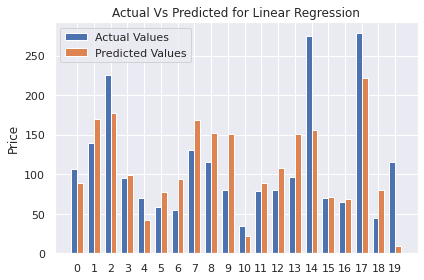

In [113]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

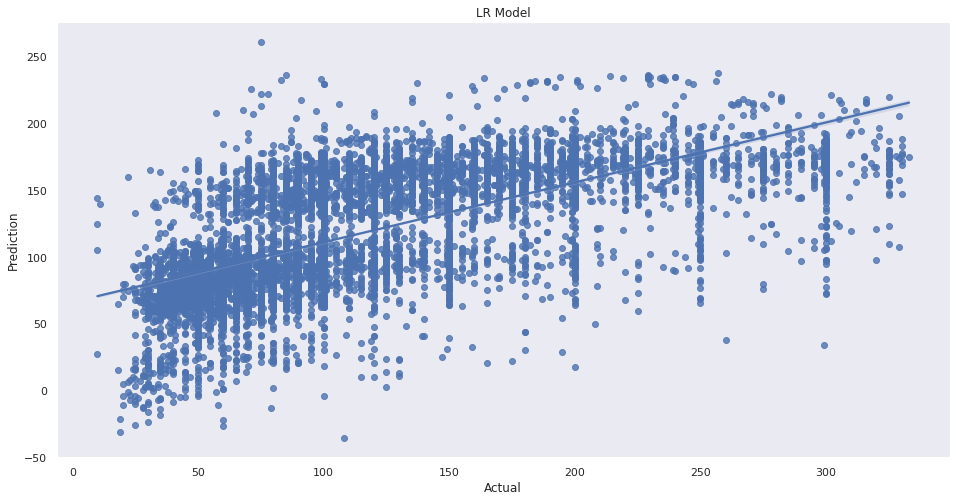

In [114]:
plt.figure(figsize=(16,8))
sns.regplot(y_test,predicts)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("LR Model")
plt.grid(False)
plt.show()

normalize price and recheck the model

In [119]:
df_nyc_price=df.copy()
df_nyc_price['price'] = np.log10(df_nyc_price['price'])

In [120]:
encode.fit(df_nyc_price.neighbourhood_group)
df_nyc_price.neighbourhood_group=encode.transform(df_nyc_price.neighbourhood_group)

In [121]:
encode = preprocessing.LabelEncoder()
encode.fit(df_nyc_price.neighbourhood)
df_nyc_price.neighbourhood=encode.transform(df_nyc_price.neighbourhood)
encode = preprocessing.LabelEncoder()
encode.fit(df_nyc_price.room_type)
df_nyc_price.room_type=encode.transform(df_nyc_price.room_type)
df_nyc_price.sort_values(by='price',ascending=True,inplace=True)

In [122]:
l_reg = LinearRegression()
X = df_nyc_price[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df_nyc_price['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [123]:
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

Mean Squared Error:  0.1753615772621385
R2 Score:  51.43839455556738
Mean Absolute Error:  0.13625872654730267
Mean Squareroot Error:  0.030751682779864967


In [124]:
#Actual Vs Predicted for Linear Regression
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))


   actual_values  predicted_values
0       2.029384          1.906584
1       2.146128          2.212841
2       2.352183          2.230142
3       1.977724          1.931876
4       1.845098          1.701062


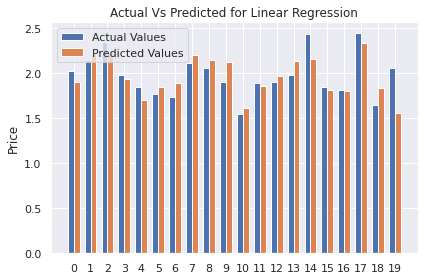

In [126]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

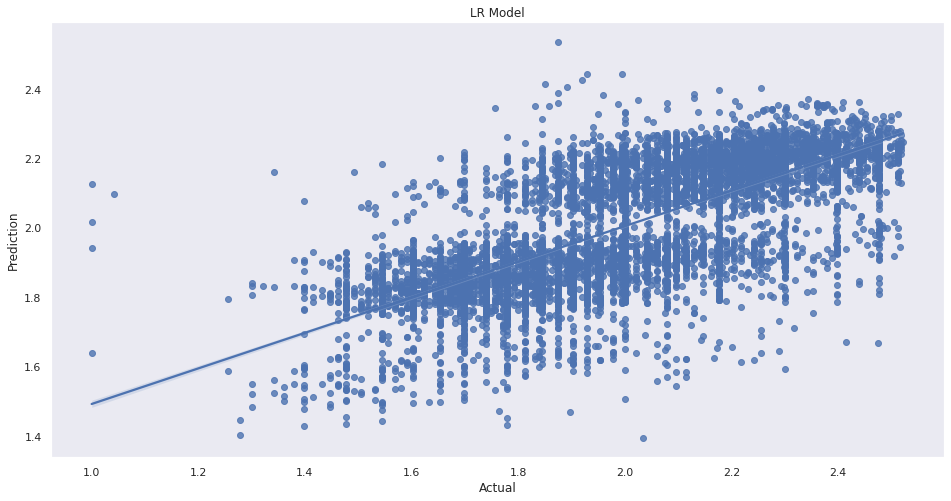

In [125]:
plt.figure(figsize=(16,8))
sns.regplot(y_test,predicts)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title("LR Model")
plt.grid(False)
plt.show()